<a href="https://colab.research.google.com/github/saikrish1105/Heart-Disease-Detection/blob/main/Football_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# **Painful Pre-Proccesing of Data**

In [ ]:
df = pd.read_csv("international_matches.csv")

#convert the target column to integer
mapping = {'Win': 0, 'Draw': 1, 'Lose': 2}
df['home_team_result'] = df['home_team_result'].map(mapping)

#remove all columns with datatype object as they are useless for win
for col in df.columns:
    if df[col].dtype == object:
        df = df.drop(col, axis=1)

#convert boolean column to integer
df['neutral_location'] = df['neutral_location'].astype(int)

In [ ]:
# gives the percentage of null values in each column
df.isnull().sum()/len(df)*100

home_team_fifa_rank               0.000000
away_team_fifa_rank               0.000000
home_team_total_fifa_points       0.000000
away_team_total_fifa_points       0.000000
home_team_score                   0.000000
away_team_score                   0.000000
neutral_location                  0.000000
home_team_result                  0.000000
home_team_goalkeeper_score       64.972200
away_team_goalkeeper_score       66.159441
home_team_mean_defense_score     67.447013
home_team_mean_offense_score     64.424564
home_team_mean_midfield_score    65.879353
away_team_mean_defense_score     68.379248
away_team_mean_offense_score     65.252289
away_team_mean_midfield_score    66.644371
dtype: float64

In [ ]:
drop all rows withthout atleast 2 non null values from home_team_goalkeeper_score to away_team_mean_midfield_score
df = df.dropna(axis=0, thresh=2,subset=['home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_defense_score',
                                        'away_team_mean_defense_score','home_team_mean_offense_score','away_team_mean_offense_score',
                                        'home_team_mean_midfield_score','away_team_mean_midfield_score'])



Fill missing values with mean
df.fillna(df.mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   home_team_fifa_rank          23921 non-null  int64
 1   away_team_fifa_rank          23921 non-null  int64
 2   home_team_total_fifa_points  23921 non-null  int64
 3   away_team_total_fifa_points  23921 non-null  int64
 4   home_team_score              23921 non-null  int64
 5   away_team_score              23921 non-null  int64
 6   neutral_location             23921 non-null  int64
 7   home_team_result             23921 non-null  int64
dtypes: int64(8)
memory usage: 1.5 MB


In [ ]:
#should give 0 now
df.isnull().sum()/len(df)*100

home_team_fifa_rank            0.0
away_team_fifa_rank            0.0
home_team_total_fifa_points    0.0
away_team_total_fifa_points    0.0
home_team_score                0.0
away_team_score                0.0
neutral_location               0.0
home_team_result               0.0
dtype: float64

In [ ]:
#move the target column to the end
column_to_move = df.pop("home_team_result")
df.insert(len(df.columns), "home_team_result", column_to_move)
df

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,home_team_result
0,59,22,0,0,3,1,0,0
1,8,14,0,0,1,1,0,1
2,35,94,0,0,5,0,0,0
3,65,86,0,0,1,0,0,0
4,67,5,0,0,1,3,0,2
...,...,...,...,...,...,...,...,...
23916,180,153,932,1040,2,1,0,0
23917,192,135,895,1105,0,2,0,2
23918,28,60,1526,1387,0,0,1,2
23919,23,35,1553,1499,0,3,0,2


# Implementing A Model On The Dataset

In [ ]:
# Split the dataset into train, test and validation
train, valid, test = np.split(df,[int(0.65*len(df)),int(0.85*len(df))])  # 65% = Train Set - 20% = Validation Set - 15% = Test Set

In [ ]:
def scale_df(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()

  X_scaled = scaler.fit_transform(X)

  ros = RandomOverSampler()
  X_scaled_sampled, Y_sampled = ros.fit_resample(X_scaled,Y)

  data = np.hstack((X_scaled,np.reshape(Y,(-1,1))))

  return data, X_scaled_sampled, Y_sampled

In [ ]:
data, X,Y = scale_df(df)
train, X_train, Y_train = scale_df(train)
test, X_test, Y_test = scale_df(test)
valid, X_valid, Y_valid = scale_df(valid)

In [ ]:
# Accuracy Finder
def compute_accuracy(Y_true, Y_pred):
    correctly_predicted = 0
    # iterating over every label and checking it with the true sample
    for true_label, predicted in zip(Y_true, Y_pred):
        if true_label == predicted:
            correctly_predicted += 1
    # computing the accuracy score
    accuracy_score = correctly_predicted / len(Y_true)
    return accuracy_score

#Accuracy Dictionary of All Models
accuracy = {}

In [ ]:
Y_train

array([0, 1, 0, ..., 2, 2, 2])

## Tensorflow

In [ ]:
import tensorflow.keras as tf

model = tf.Sequential([
    tf.layers.Dense(10, activation='relu', input_shape=(7,)),
    tf.layers.BatchNormalization(),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(128, activation='relu'),
    tf.layers.BatchNormalization(),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(64, activation='relu'),
    tf.layers.BatchNormalization(),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(16, activation='relu'),
    tf.layers.BatchNormalization(),
    tf.layers.Dropout(0.2),
    tf.layers.Dense(3, activation='softmax')  # Output layer with 3 units for 3 classes
])

model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',  # Change the loss function
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_valid, Y_valid), verbose=1)


Epoch 1/10
722/722 [==============================] - 6s 4ms/step - loss: 0.5470 - accuracy: 0.7650 - val_loss: 0.1358 - val_accuracy: 0.9606
Epoch 2/10
722/722 [==============================] - 3s 4ms/step - loss: 0.2190 - accuracy: 0.9257 - val_loss: 0.0728 - val_accuracy: 0.9879
Epoch 3/10
722/722 [==============================] - 3s 4ms/step - loss: 0.1558 - accuracy: 0.9546 - val_loss: 0.0720 - val_accuracy: 0.9869
Epoch 4/10
722/722 [==============================] - 3s 4ms/step - loss: 0.1211 - accuracy: 0.9692 - val_loss: 0.0763 - val_accuracy: 0.9849
Epoch 5/10
722/722 [==============================] - 3s 4ms/step - loss: 0.1086 - accuracy: 0.9746 - val_loss: 0.0726 - val_accuracy: 0.9863
Epoch 6/10
722/722 [==============================] - 3s 4ms/step - loss: 0.1059 - accuracy: 0.9754 - val_loss: 0.0832 - val_accuracy: 0.9812
Epoch 7/10
722/722 [==============================] - 3s 4ms/step - loss: 0.0993 - accuracy: 0.9791 - val_loss: 0.0789 - val_accuracy: 0.9812
Epoch 

In [ ]:
Y_pred_nn = np.round(model.predict(X_test))
Y_pred_nn

165/165 [==============================] - 0s 2ms/step


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

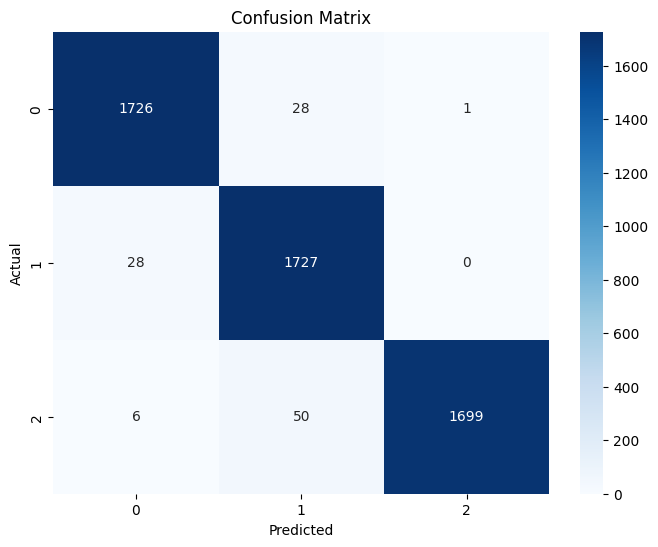

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# np.argmax returns the index (class label) with the highest probability for each sample
Y_pred_classes = np.argmax(Y_pred_nn, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       774
           1       0.96      1.00      0.98       774
           2       1.00      0.98      0.99       774

    accuracy                           0.99      2322
   macro avg       0.99      0.99      0.99      2322
weighted avg       0.99      0.99      0.99      2322

